In [ ]:
import re
import pickle

corpus3_sentences = []
f = open('corpus3.txt','r')
corpus3_sentences=f.readlines()
f.close()

corpus4_sentences = []
f = open('corpus4.txt','r',encoding='utf-8')
corpus4_sentences=f.readlines()
f.close()

In [4]:
import re
## pakka waala final
def word_tokenizer(sentence):
    scanner = re.Scanner([
        (b"[\x80-\xff]+", lambda scanner,token: token),
        (r"[a-zA-Z0-9]+@([a-zA-Z0-9]+\.*){2,3}",lambda scanner,token: token),
        (r"http[s]*://[A-Z0-9a-z./]*",lambda scanner,token: token),
        (r'[A-Z]+[a-z]{0,3}.', lambda scanner,token:token),
        (r"#\w+(.[\w])*",lambda scanner,token: token),
        (r"@\w+(.[\w])*",lambda scanner,token: token),
        (r"[0-9]+% | [0-9]+\ %", lambda scanner,token: token),
        (r"[0-9.]+", lambda scanner,token: token),
        (r"\w+", lambda scanner,token: token),
        (r"$[0-9]+(.[0-9]+)*",lambda scanner,token: token),
        (r"\s+",lambda scanner,token: None),
        (r"\n",lambda scanner,token: None),
        (r"\\n",lambda scanner,token: None),
        (r"[\",.?!`'’\-@&;\(\):\/#$\*\|=]+", lambda scanner,token: token),
        (r"[0-9]+", lambda scanner,token: token),
    ])
    
    results,remainder = scanner.scan(sentence)
    
    if(len(remainder)>0):
#         print(sentence)
#         print(results)
#         print(remainder)
        macro_tokens = remainder.split(b' ')
        for i in range(len(macro_tokens)):
            results.append(macro_tokens[i])
    return results

In [7]:
f = open('test.txt','r',encoding='utf-8')
corpus=f.readlines()
f.close()
for line in corpus:
    print(b" ".join(word_tokenizer(line.encode('utf-8'))))

b'The  tower is being built .'
b'@trump email i d is trump@abc.com.'
b"The  lamp he ' s buying is worth $ 5.80."
b'The  website for the course is https://www.moodle.com or www . moodle . com .'
b'He  has an apple , a banana and a guava .'
b'Barry E. is a scientist , a doctor and an engineer .'
b'#newyork i s ruled by @john .'
b'@mark juist spent $ 500 million .'
b'it is sad .... that he ate the building #sad ,@ happy .'
b"He' ll .... be .... present ..... at .... the ,,,,, conference ..... with .... mark@cuban.com #mark @cuban"
b'my birthday is on 25 Janua ry'
b'my birthday is on 25 / 01'
b'This  cost is 5.01.'
b'The  IP  address is 127.0.0.1.'
b'Barac k O. is going to @thewhitehouse a t 7 : 00 PM  #govern .'
b''


In [11]:
f = open('corpus3_token.txt','wb')
for line in corpus3_sentences:
    f.write((b" ".join(word_tokenizer(line.encode('utf-8')))))
    f.write(b"\n")
f.close()

f = open('corpus4_token.txt','wb')
for line in corpus4_sentences:
    f.write((b" ".join(word_tokenizer(line.encode('utf-8')))))
    f.write(b'\n')
f.close()

In [51]:

def n_gram(data,n=2):
    diction = {}
    for line in data:
        tokens = word_tokenizer(line.encode('utf-8'))
        for i in range(len(tokens)-n):
            key = b' '.join(tokens[i:i+n])
            if key not in diction:
                diction[key] = 1
            else:
                diction[key] += 1
    return diction
    

In [52]:
data_count=[[],[],[],[],[],[],[]]
data_count[0] = [{}]
data_count[1] = n_gram(corpus3_sentences,n=1)
data_count[2] = n_gram(corpus3_sentences,n=2)
data_count[3] = n_gram(corpus3_sentences,n=3)
data_count[4] = n_gram(corpus3_sentences,n=4)
data_count[5] = n_gram(corpus3_sentences,n=5)
data_count[6] = n_gram(corpus3_sentences,n=6)

In [53]:
print(data_count[1][b'is'])

1560


In [19]:
# import pickle
# f = open('corpus3_1','wb')
# pickle.dump(data_count_1,f)
# f.close()
# f = open('corpus3_2','wb')
# pickle.dump(data_count_2,f)
# f.close()
# f = open('corpus3_3','wb')
# pickle.dump(data_count_3,f)
# f.close()
# f = open('corpus3_4','wb')
# pickle.dump(data_count_4,f)
# f.close()
# f = open('corpus3_5','wb')
# pickle.dump(data_count_5,f)
# f.close()
# f = open('corpus3_6','wb')
# pickle.dump(data_count_6,f)
# f.close()


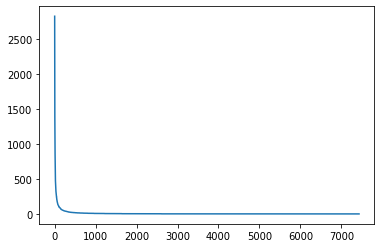

In [54]:
from matplotlib import pyplot as plt 
import operator

f=open('corpus3_1','rb')
unigrams=pickle.load(f)
f.close()
freq = []
dsort = sorted(unigrams.items(), key=operator.itemgetter(1),reverse=True)
for i in range(len(dsort)):
    freq.append(dsort[i][1])
plt.plot(freq)

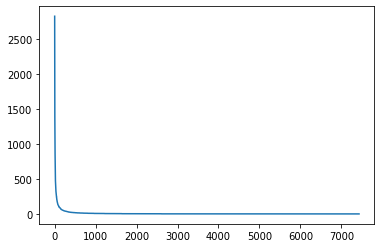

In [55]:
f=open('corpus3_1','rb')
unigrams=pickle.load(f)
f.close()
freq = []
dsort = sorted(unigrams.items(), key=operator.itemgetter(1),reverse=True)
for i in range(len(dsort)):
    freq.append(dsort[i][1])
plt.plot(freq)

In [158]:
def count_kn(ngram,highest_order):
    print("count_kn",ngram)
    words = ngram.split(b' ')    
    l = len(words)
    c_kn=0
    if(l==highest_order):
        if ngram in data_count[l]:
            c_kn = data_count[l][ngram]
    else:
#         w_n1 = b" ".join(words[1:])
        for key in data_count[l+1]:
            if (b" ".join(key.split(b" ")[1:])) == ngram:
#             if key == ngram:
                c_kn += 1
    print(c_kn)
    return c_kn
                
def count_fn(ngram):
    words = ngram.split(b' ')    
    l = len(words)
#     w_i = b" ".join(words[:-1])
#     print(w?_i)
    count=0
    for key in data_count[l+1]:
        if (b" ".join(key.split(b" ")[:-1])) == ngram:
            count += 1
    return count
    
    
def p_kn(ngram,highest_order=4,d=0.75):
    print("Probability of ",ngram)
    words = ngram.split(b' ')    
    l = len(words)
            
    dem = 1
    if(highest_order==l):
        if b" ".join(words[:-1]) in data_count[l-1]:
            dem = data_count[l-1][b" ".join(words[:-1]),highest_order]
    else:
        dem = len(data_count[l].keys())
#     lam=(d*count_fn(ngram))/count_kn(b" ".join(words[:-1]),highest_order)
    
    if(l==1):
        ret = count_kn(ngram,highest_order)
        print(ret)
        return ret
    
    ret = (max(count_kn(ngram,highest_order)-d,0) + (d*count_fn(ngram)) * p_kn(b" ".join(words[1:])))/dem
    print(ret)
    return ret            

In [159]:
# for key in data_count[5]:
print(p_kn(b'This man is',highest_order=3))

Probability of  b'This man is'
count_kn b'This man is'
0
Probability of  b'man is'
count_kn b'man is'
6
Probability of  b'is'
count_kn b'is'
418
418
0.10500912131346914
0.0
0.0
